L'objectif de ce notebook est de rassembler des techniques d'analyse non supervisé des données.
Les algorithmes étudiées sont les suivants :

- ACP
- KMeans
- Variational AutoEncoder

En exercice vous serez amené à réaliser une ACP et un KMeans.

L'objectif technique : 

In [ ]:
# Attention : prend 2 minutes
!gdown https://drive.google.com/uc?id=1emmjcpCKDOWQoS2ZL6ZLcSIxNgUBQmOh -O USE_CASE_1.zip

Downloading...
From: https://drive.google.com/uc?id=1emmjcpCKDOWQoS2ZL6ZLcSIxNgUBQmOh
To: /content/USE_CASE_1.zip
100% 3.30G/3.30G [00:48<00:00, 68.2MB/s]


In [ ]:
#!unzip USE_CASE_1.zip

# Function to plot interactive graphs

In [ ]:
import plotly
from plotly.graph_objs import Scatter, Layout, Bar

# Unsupervised Learning

Two algorithms will be experimented

1- Principal Component Analysis (PCA)

2- KMeans 

## PCA

In [ ]:
 #!pip install geopandas

In [ ]:
import numpy as np
import geopandas as gpd
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from copy import deepcopy

In [ ]:
def pca_classic(Xraw):
    LL = Xraw.shape[1]
    X = (Xraw-np.mean(Xraw,axis=0))/np.std(Xraw,axis=0)
    X = X.T
    
    #load the feature space
    mean_matrix = np.zeros(X.shape[0],dtype = np.float64)
    
    ## Computing the mean
    for d in range (0,X.shape[0]):
        mean_matrix[d] = np.mean(X[d,:])
        
    #Compute the covairance matrix
    cov_mat = np.cov(X)
    
    #print('Covariance Matrix:\n', cov_mat)
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
    for ev in eig_vec_cov:
        np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = sorted(eig_pairs,key=lambda x:x[0],reverse= True)

    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    #for i in eig_pairs:
        #print(i[0])

    matrix_w = np.hstack((eig_pairs[0][1].reshape(LL,1), eig_pairs[1][1].reshape(LL,1)))
    #print('Matrix W:\n', matrix_w)
    matrix_v = np.hstack((eig_pairs[0][1].reshape(LL,1), eig_pairs[1][1].reshape(LL,1),eig_pairs[2][1].reshape(LL,1) ))
    transformed = matrix_w.T.dot(X)
    transformed_v = matrix_v.T.dot(X)
    return transformed_v


In [ ]:
gdf_file = './USE_CASE_1/reconstructed_stats/reconstructed_stats/T31TCJ_median_ndvi.shp'
gdf = gpd.read_file(gdf_file)

In [ ]:
date_cols = gdf.columns[8:-1]
data = gdf[date_cols]
data

,20181112,20181117,20181127,20190111,20190116,20190215,20190220,20190225,20190322,20190327,20190501,20190531,20190705,20190710,20190715,20190725,20190804,20190809,20190814,20190824,20190913,20191008,20191013
0,0.225880,0.402877,0.651829,0.669520,0.633834,0.140981,0.154341,0.138403,0.139207,0.131674,0.136735,0.198747,0.645234,0.784399,0.727054,0.578611,0.594734,0.608153,0.644175,0.606064,0.327259,0.211341,0.199078
1,0.305204,0.325589,0.366240,0.412587,0.282082,0.135613,0.131725,0.128513,0.132203,0.119140,0.118509,0.176152,0.873054,0.917857,0.915328,0.886364,0.891055,0.890878,0.907466,0.889100,0.865731,0.606084,0.436044
2,0.223748,0.237835,0.322333,0.289941,0.303216,0.267771,0.258595,0.234161,0.145205,0.128049,0.112323,0.187414,0.706473,0.831043,0.855697,0.839615,0.849599,0.887320,0.894450,0.876023,0.822231,0.509181,0.423261
3,0.165396,0.192027,0.201810,0.279955,0.290970,0.308655,0.155310,0.145823,0.124328,0.120332,0.147760,0.224771,0.849654,0.896828,0.902086,0.873365,0.857395,0.871039,0.880243,0.846292,0.534748,0.203958,0.197751
4,0.220622,0.248052,0.281957,0.458022,0.498054,0.477627,0.466097,0.461390,0.303446,0.266970,0.135327,0.147316,0.729151,0.770675,0.787642,0.771484,0.821389,0.828034,0.861426,0.842315,0.798481,0.450977,0.406509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.115875,0.146863,0.202459,0.371460,0.498958,0.556214,0.578424,0.612182,0.750795,0.769765,0.820233,0.849069,0.210395,0.205631,0.191739,0.173371,0.179072,0.123517,0.138852,0.159548,0.139250,0.113067,0.134037
4996,0.148536,0.208777,0.324335,0.525794,0.806542,0.814680,0.833881,0.825928,0.879330,0.906598,0.909189,0.881031,0.211320,0.202942,0.204485,0.193943,0.153901,0.141882,0.165984,0.130939,0.136294,0.109018,0.131889
4997,0.104522,0.162730,0.238011,0.591131,0.635280,0.586769,0.580762,0.580784,0.652990,0.669137,0.811052,0.798176,0.184051,0.159064,0.161259,0.152625,0.144305,0.113795,0.124115,0.137309,0.125134,0.105679,0.120140
4998,0.116782,0.118851,0.113749,0.284821,0.338512,0.372894,0.375498,0.372715,0.441946,0.458466,0.780222,0.800986,0.205736,0.194420,0.193043,0.180823,0.165608,0.155884,0.178390,0.221950,0.307342,0.206689,0.204251


In [ ]:
transformed_data = pca_classic(data.values)
transformed_data = transformed_data.T
transformed_data.shape

(5000, 3)

In [ ]:
transformed_data

array([[ 2.69363239,  0.31883806,  1.69986499],
       [ 5.96672024,  1.6069976 , -1.76207255],
       [ 5.11069912,  1.22638075, -1.61088799],
       ...,
       [-4.25038659, -0.65037535,  0.74861769],
       [-2.29483558, -2.14854894, -1.02039081],
       [-3.75696951, -1.55447332,  0.3007455 ]])

In [ ]:
gdf.iloc[:, 0:10]

,fid,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,area,20181112,20181117
0,7918132.0,8583490,2.71,MIS,2,None,None,27085.062805,0.225880,0.402877
1,7109780.0,14712598,2.60,MIS,2,None,None,25972.267365,0.305204,0.325589
2,7021173.0,12205360,5.57,MIS,2,None,None,55591.881784,0.223748,0.237835
3,7891909.0,16205895,5.00,MIS,2,None,None,49999.741512,0.165396,0.192027
4,695973.0,16183747,4.25,MIS,2,DFV,DVS,42492.768066,0.220622,0.248052
...,...,...,...,...,...,...,...,...,...,...
4995,7866928.0,16178895,2.50,BTH,1,None,None,25009.197594,0.115875,0.146863
4996,7043233.0,3150954,7.62,BTH,1,None,None,76108.772327,0.148536,0.208777
4997,7951143.0,8545608,6.90,BTH,1,None,None,69007.675065,0.104522,0.162730
4998,7219111.0,10062551,15.74,BTH,1,None,None,157208.368362,0.116782,0.118851


In [ ]:
gdf.head()

,fid,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,area,20181112,20181117,20181127,20190111,20190116,20190215,20190220,20190225,20190322,20190327,20190501,20190531,20190705,20190710,20190715,20190725,20190804,20190809,20190814,20190824,20190913,20191008,20191013,geometry
0,7918132.0,8583490,2.71,MIS,2,None,None,27085.062805,0.225880,0.402877,0.651829,0.669520,0.633834,0.140981,0.154341,0.138403,0.139207,0.131674,0.136735,0.198747,0.645234,0.784399,0.727054,0.578611,0.594734,0.608153,0.644175,0.606064,0.327259,0.211341,0.199078,"POLYGON ((346100.728 4856718.116, 346101.164 4..."
1,7109780.0,14712598,2.60,MIS,2,None,None,25972.267365,0.305204,0.325589,0.366240,0.412587,0.282082,0.135613,0.131725,0.128513,0.132203,0.119140,0.118509,0.176152,0.873054,0.917857,0.915328,0.886364,0.891055,0.890878,0.907466,0.889100,0.865731,0.606084,0.436044,"POLYGON ((388836.372 4848383.454, 388836.586 4..."
2,7021173.0,12205360,5.57,MIS,2,None,None,55591.881784,0.223748,0.237835,0.322333,0.289941,0.303216,0.267771,0.258595,0.234161,0.145205,0.128049,0.112323,0.187414,0.706473,0.831043,0.855697,0.839615,0.849599,0.887320,0.894450,0.876023,0.822231,0.509181,0.423261,"POLYGON ((317915.388 4796580.085, 317910.352 4..."
3,7891909.0,16205895,5.00,MIS,2,None,None,49999.741512,0.165396,0.192027,0.201810,0.279955,0.290970,0.308655,0.155310,0.145823,0.124328,0.120332,0.147760,0.224771,0.849654,0.896828,0.902086,0.873365,0.857395,0.871039,0.880243,0.846292,0.534748,0.203958,0.197751,"POLYGON ((404297.751 4848228.615, 404328.793 4..."
4,695973.0,16183747,4.25,MIS,2,DFV,DVS,42492.768066,0.220622,0.248052,0.281957,0.458022,0.498054,0.477627,0.466097,0.461390,0.303446,0.266970,0.135327,0.147316,0.729151,0.770675,0.787642,0.771484,0.821389,0.828034,0.861426,0.842315,0.798481,0.450977,0.406509,"POLYGON ((393371.402 4844649.750, 393322.862 4..."


In [ ]:
gdf['CODE_GROUP'].unique()

array(['2', '1'], dtype=object)

In [ ]:
fig = px.scatter_3d(x=transformed_data[:,0], y=transformed_data[:,1], z=transformed_data[:,2],
              color=gdf['CODE_CULTU'])
fig.show()

In [ ]:
fig = px.scatter(x=transformed_data[:,0], y=transformed_data[:,1], color=gdf['CODE_CULTU'])
fig.show()

In [ ]:
l = []
for i in np.array(gdf['CODE_CULTU']):
    if i == "MIS":
        l.append(0)
    else:
        l.append(1)

In [ ]:
len(l)

5000

# Exercice
  Appliquer la méthode l'ACP accessible depuis la librairie `sklearn` de Python.
  Puis comparer les résultats avec la fonction précédente.

In [ ]:
## A vous de jouer !

## Une correction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

date_cols = gdf.columns[8:-1]
data_2 = gdf[date_cols]

scaler = StandardScaler()
x = scaler.fit_transform(data_2.values)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

fig = px.scatter_3d(x=principalComponents[:,0], y=principalComponents[:,1], z=principalComponents[:,2],
              color=gdf['CODE_CULTU'])
fig.show()

## KMeans
Algorithme de clustering non supervisé le plus utilisé, le plus puissant.
Il y a aussi, les algorithmes suivants :
- Hierarchical
- PSO
- Genetic

Pour l'algorithme du KMeans, il faut initialiser certains paramètres :
- K le nombre de clusters
- Les K centres

In [ ]:
def kmeans(X,k):
    # Number of training data
    n = X.shape[0]
    # Number of features in the data
    c = X.shape[1]

    # Generate random centers, here we use sigma and mean to ensure it represent the whole data
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    # Plot the data and the centers generated as random
    plt.scatter(X[:,0], X[:,1], s=7)
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
    
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = deepcopy(centers) # Store new centers
    clusters = np.zeros(n)
    distances = np.zeros((n,k))

    error = np.linalg.norm(centers_new - centers_old)
    
    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    return centers_new,clusters   


## KMeans on the transformed dataset

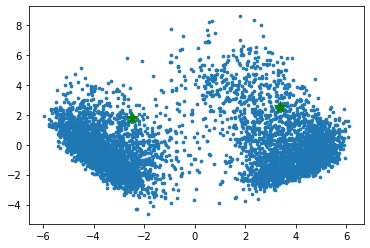

In [ ]:
centers,clusters = kmeans(transformed_data,2)

In [ ]:
# Scatter plot with clustering results
fig = px.scatter_3d(x=transformed_data[:,0], y=transformed_data[:,1], z=transformed_data[:,2],
              color=clusters,text=gdf['CODE_GROUP'])
fig.show()

# en couleur les labels
# en chiffre le cluster

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_true = gdf['CODE_GROUP'].astype(int)-1
y_predict = clusters
y_predict[y_predict==5] = 1
y_predict[y_predict==6] = 0

accuracy = accuracy_score(y_true,y_predict)
f_score = f1_score(y_true,y_predict)
p_score = precision_score(y_true,y_predict)
r_score = recall_score(y_true,y_predict)

In [ ]:
confusion_matrix(y_true, y_predict)

array([[2495,    5],
       [  67, 2433]])

In [ ]:
print("accuracy =", accuracy, '\n', "f_score =", f_score, '\n', "p_score =", p_score, '\n', "r_score =", r_score)

accuracy = 0.9856 
 f_score = 0.9854191980558931 
 p_score = 0.9979491386382281 
 r_score = 0.9732


# Exercice
  Appliquer la méthode du KMeans sur le résultat de l'ACP (qui a permis de réduire la dimension de notre base de données). Appliquer la méthode du KMeans accessible depuis la librairie `sklearn` de Python.
  Puis comparer les résultats avec la fonction précédente.

  Pourquoi obtenons des résultats différents si nous lançons plusieurs KMeans sur les même données, avec le même nombre de clusters ?

In [ ]:
## A vous de jouer !

## Une correction

In [ ]:
from sklearn.cluster import KMeans

date_cols = gdf.columns[8:-1]
data_2 = gdf[date_cols]
scaler = StandardScaler()
x = scaler.fit_transform(data_2.values)

kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
y_pred = kmeans.predict(x)


from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_true = gdf['CODE_GROUP'].astype(int)-1
y_predict = y_pred

accuracy = accuracy_score(y_true,y_predict)
f_score = f1_score(y_true,y_predict)
p_score = precision_score(y_true,y_predict)
r_score = recall_score(y_true,y_predict)

print(p_score, '\n', r_score)

0.9959464937170652 
 0.9828
